In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [98]:
from sklearn.datasets import fetch_openml

In [99]:
titanic_data=fetch_openml("titanic",version=1,as_frame=True)

In [100]:
titanic_data

{'data':       pclass                                             name     sex  \
 0          1                    Allen, Miss. Elisabeth Walton  female   
 1          1                   Allison, Master. Hudson Trevor    male   
 2          1                     Allison, Miss. Helen Loraine  female   
 3          1             Allison, Mr. Hudson Joshua Creighton    male   
 4          1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
 ...      ...                                              ...     ...   
 1304       3                             Zabour, Miss. Hileni  female   
 1305       3                            Zabour, Miss. Thamine  female   
 1306       3                        Zakarian, Mr. Mapriededer    male   
 1307       3                              Zakarian, Mr. Ortin    male   
 1308       3                               Zimmerman, Mr. Leo    male   
 
           age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
 0     29.0000      0 

In [101]:
df=titanic_data['data']

In [102]:
df['survived']=titanic_data['target']

In [103]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

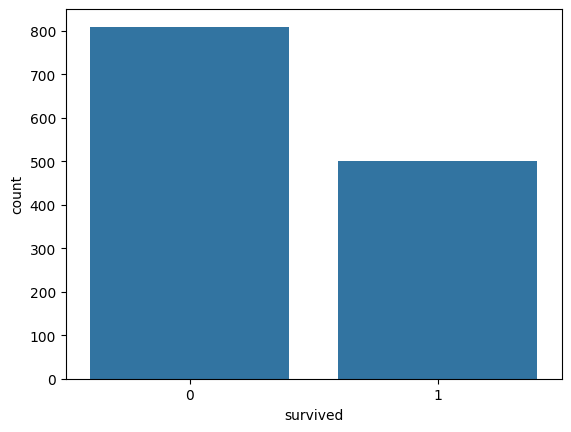

In [104]:
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

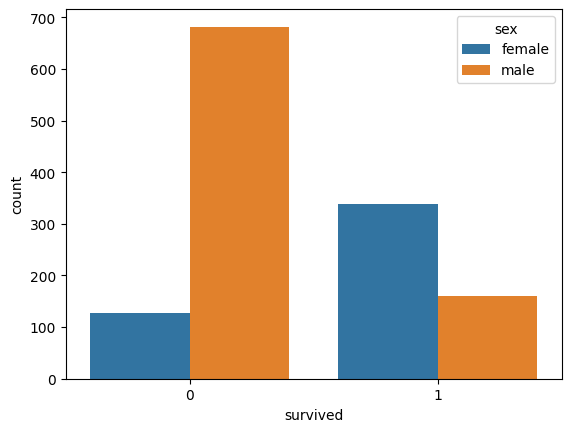

In [105]:
sns.countplot(x='survived',data=df,hue='sex')

<Axes: xlabel='survived', ylabel='count'>

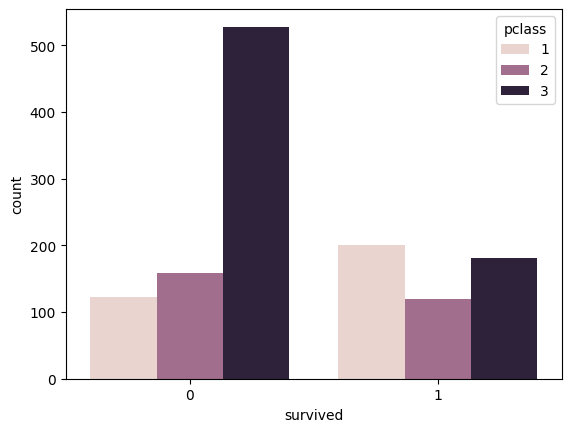

In [106]:
sns.countplot(x='survived',data=df,hue='pclass')

<Axes: ylabel='Frequency'>

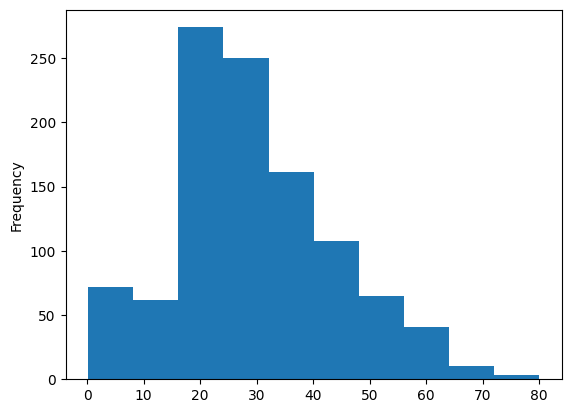

In [107]:
df['age'].plot.hist()

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [109]:
df.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'missing value in percentage'}, ylabel='percentage'>

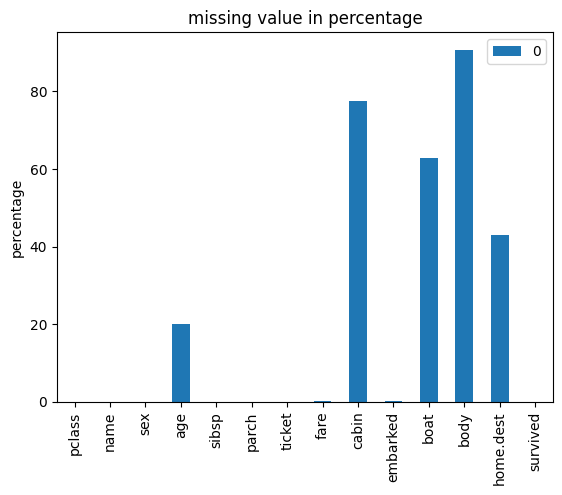

In [110]:
miss_value=pd.DataFrame(df.isna().sum()/len(df)*100)

miss_value.plot(kind='bar',title='missing value in percentage',ylabel='percentage')

In [111]:
df['family']=df.sibsp+df.parch

df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family']==0,'travelled_alone']=1


In [112]:
df.family.head()

0    0
1    3
2    3
3    3
4    3
Name: family, dtype: int64

In [113]:
df.drop(columns=['sibsp','parch'],axis=1,inplace=True)

<Axes: xlabel='travelled_alone', ylabel='count'>

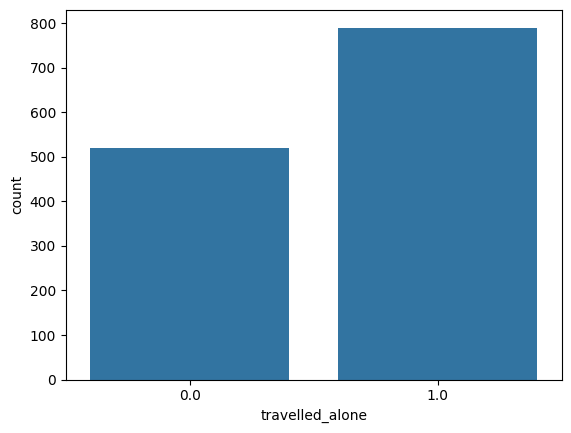

In [114]:
sns.countplot(x='travelled_alone',data=df)

In [115]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [116]:
df.drop(['name','ticket','home.dest','cabin','body','boat'],axis=1,inplace=True)

In [117]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [118]:
from sklearn.preprocessing import OrdinalEncoder

In [119]:
ord=OrdinalEncoder()

In [120]:
df['sex']=ord.fit_transform(df[['sex']])

In [121]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,0.0,29.0000,211.3375,S,1,0,1.0
1,1,1.0,0.9167,151.5500,S,1,3,0.0
2,1,0.0,2.0000,151.5500,S,0,3,0.0
3,1,1.0,30.0000,151.5500,S,0,3,0.0
4,1,0.0,25.0000,151.5500,S,0,3,0.0


In [122]:
df.isna().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
dtype: int64

In [123]:
from sklearn.impute import SimpleImputer

In [124]:
imp_mean=SimpleImputer(strategy='mean')

In [125]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])


In [126]:
df.isna().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
family             0
travelled_alone    0
dtype: int64

In [127]:
from sklearn.impute import SimpleImputer
imp_frq=SimpleImputer(strategy='most_frequent')

In [128]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,0.0,29.0000,211.3375,S,1,0,1.0
1,1,1.0,0.9167,151.5500,S,1,3,0.0
2,1,0.0,2.0000,151.5500,S,0,3,0.0
3,1,1.0,30.0000,151.5500,S,0,3,0.0
4,1,0.0,25.0000,151.5500,S,0,3,0.0


In [129]:
df['embarked'].unique()

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [130]:
df['embarked']=imp_frq.fit_transform(df[['embarked']]).ravel()

In [131]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [132]:
df.isna().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
family             0
travelled_alone    0
dtype: int64

In [133]:
embark=pd.get_dummies(df['embarked'],drop_first=True)

In [134]:
df.drop(['embarked'],axis=1,inplace=True)
df=pd.concat([df,embark],axis=1)

In [135]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,0.0,29.0000,211.3375,1,0,1.0,False,True
1,1,1.0,0.9167,151.5500,1,3,0.0,False,True
2,1,0.0,2.0000,151.5500,0,3,0.0,False,True
3,1,1.0,30.0000,151.5500,0,3,0.0,False,True
4,1,0.0,25.0000,151.5500,0,3,0.0,False,True


In [137]:
sub=OrdinalEncoder()

In [138]:
df['Q']=sub.fit_transform(df[['Q']])
df['S']=sub.fit_transform(df[['S']])

In [139]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,0.0,29.0000,211.3375,1,0,1.0,0.0,1.0
1,1,1.0,0.9167,151.5500,1,3,0.0,0.0,1.0
2,1,0.0,2.0000,151.5500,0,3,0.0,0.0,1.0
3,1,1.0,30.0000,151.5500,0,3,0.0,0.0,1.0
4,1,0.0,25.0000,151.5500,0,3,0.0,0.0,1.0


In [140]:
X=df.drop(['survived'],axis=1)

In [141]:
y=df['survived']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [144]:
from sklearn.linear_model import  LogisticRegression

In [145]:
model=LogisticRegression()

In [147]:
model.fit(X_train,y_train)

c:\Program Files\Python312EDA\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
ypred=model.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [151]:
accuracy_score(y_test,ypred)

0.7989821882951654

In [153]:
confusion_matrix(y_test,ypred)

array([[204,  32],
       [ 47, 110]])